In [1]:
import requests
import pickle
import time
import numpy as np
import random
import networkx as nx
from time import sleep
import matplotlib.pyplot as plt

api_key = "4cf138d1c7a61ceb0ca55c01b032a656"
base_url = "http://ws.audioscrobbler.com/2.0/"

In [14]:
def get_friends(username, max_page):

    time.sleep(1)
    friends = []
    limit = 50
    page = 1
    retries = 0

    while True and page <= max_page:
        # call the API and return list of friends
        get_friends_params= {
            'method': 'user.getfriends',
            'user': username,
            'api_key': api_key,
            'format': 'json',
            'limit' : limit,
            'page' : page
        } # read last.fm's documentation about its API at https://www.last.fm/api !

        result=requests.get(base_url, get_friends_params)
        print("sending request to last.fm page " + str(page))

        if result.status_code == 200: #successful request!
            data = result.json() #thanks to the .json() method of the request library
            page_friends = []
            if 'friends' in data and 'user' in data['friends']:
                page_friends = [curr_user['name'] for curr_user in data['friends']['user']]
            friends.extend(page_friends)
            if len(page_friends) < limit:
                break #no more pages!
            else:
                page += 1 #next page
        elif result.status_code == 400:
            if retries < 2:
                retries += 1
                print(f"got error {result.status_code}, waiting 2 sec and retrying...")
                time.sleep(0.5)
                continue
            else:
                print("moving on...")
                break
        else:
            print("Error: code " + str(result.status_code))
            break
            
    return friends


In [4]:
get_friends('ko_tatsu',10)

sending request to last.fm page 1
sending request to last.fm page 2
sending request to last.fm page 3
sending request to last.fm page 4
sending request to last.fm page 5
sending request to last.fm page 6
sending request to last.fm page 7
sending request to last.fm page 8
sending request to last.fm page 9


['I__Am_The_Wind',
 'marta0000',
 'amic0gay',
 'cow_puppy',
 'FerrariF2001',
 'Panopticon91',
 'LuEveLi',
 'AAAAAAAGHAAAAAH',
 'Deoster',
 'DavidMetalMusic',
 'computerfire',
 'gant_zgraf',
 'magileine',
 'Cuordileone',
 'Ljlikesbadmusic',
 'sdf5',
 'tmliyfe',
 'TroensRidder',
 'imightsaysometh',
 'macingtonrs',
 'vivoinpace',
 'Miss_Fungina',
 'cloZedspace',
 'ABRS0',
 'Ururururue',
 'eielnoteleien',
 'estreetsycamore',
 'lilloliz',
 'yvngpiss',
 'paryy',
 'Trealeastre',
 'Cairnem',
 'mothercreep_',
 'TheGreep',
 'plunkster',
 'anisha_',
 'stationinmyroom',
 'Yumekooo',
 'evrynoiseatonce',
 'basicbitchtaste',
 'thesaltysalute',
 'mystery0y',
 'Rocketsauce3',
 'kvet_divizny',
 'vibrakobra',
 'Starpentine',
 'vmrrobotic',
 'actuallythesun',
 'will-lane',
 'raskolica',
 'ubernekoneko',
 'Don_Diego',
 'coaldingo',
 'WuK0275',
 'ketchuppacket',
 'zuzu80',
 'iljovvv',
 'isisaisat',
 'claudiogmessina',
 'colorsandfuel',
 'dream_puppy',
 'Adeletedperson',
 'snufkinppr',
 'Leijonanosa',
 'Kkon

In [ ]:
def add_node(graph,node,max_pages):
    graph.add_node(node)
    friends_list = get_friends(node,max_pages)
    for friend in friends_list:
        graph.add_edge(node, friend)
    return friends_list

In [7]:
def add_node_stoch(graph,node,max_pages,p):
    graph.add_node(node)
    friends_list = get_friends(node,max_pages)
    for friend in friends_list:
        a = random.random()
        if a <= p:
            graph.add_edge(node, friend)
    return friends_list

sending request to last.fm page 1
sending request to last.fm page 2


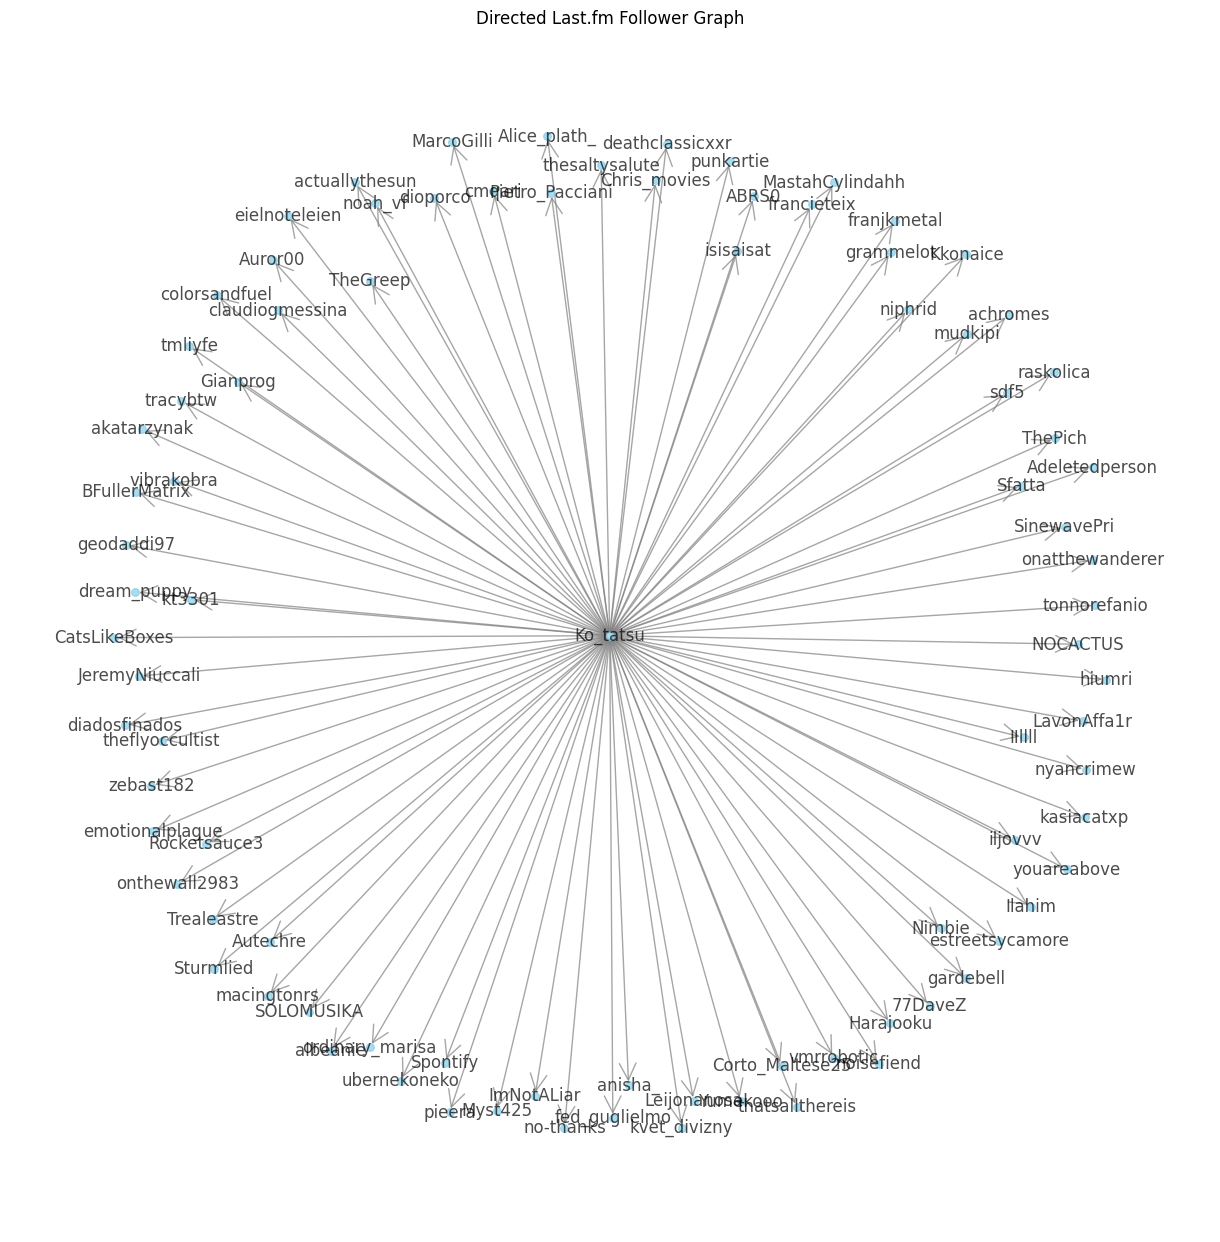

In [11]:
G = nx.DiGraph()
add_node_stoch(G, 'Ko_tatsu',2,0.5)

plt.figure(figsize=(12, 12))

pos = nx.spring_layout(G, seed=42)  # for consistent layout
nx.draw(
    G,
    pos,
    with_labels=True,
    node_size=30,
    arrows=True,
    arrowstyle='->',
    arrowsize=30,
    edge_color='gray',
    node_color='skyblue',
    alpha=0.7
)

plt.title("Directed Last.fm Follower Graph")
plt.axis("off")
plt.show()

In [9]:
def populate_graph(graph,user, depth, max_depth, max_pages, visited=None):
    if visited is None:
        visited = set()

    if depth >= max_depth:
        return
    if user in visited:
        print(f"User {user} already visited")
        return
    
    print(f"Now visiting user {user} at depth {depth}")
    visited.add(user)
    #print(visited)
    friend_list = add_node(graph,user,max_pages)
    for friend in friend_list:
        #print(friend, depth+1)
        populate_graph(graph,friend,depth+1,max_depth,max_pages,visited)
    #for friend in friend_list:
        #populate_graph(graph,friend,depth+1,max_depth,max_pages,visited)


In [15]:
def populate_graph_iterative(graph, start_user, max_depth, max_pages):
    time.sleep(1)  # tra richieste API
    visited = set()
    stack = [(start_user, 0)]  # stack holds tuples of (user, depth)

    while stack:
        user, depth = stack.pop()

        if depth >= max_depth:
            continue
        if user in visited:
            print(f"User {user} already visited")
            continue

        print(f"Now visiting user {user} at depth {depth}")
        visited.add(user)

        friend_list = add_node(graph, user, max_pages)
        # Push friends onto stack with incremented depth
        for friend in friend_list:
            stack.append((friend, depth + 1))

In [16]:
H = nx.DiGraph()
populate_graph(H,'Ko_tatsu',0,3,1)

NameError: name 'populate_graph' is not defined

In [17]:
H = nx.DiGraph()
populate_graph_iterative(H,'Ko_tatsu',3,10)

Now visiting user Ko_tatsu at depth 0
sending request to last.fm page 1
sending request to last.fm page 2
sending request to last.fm page 3
sending request to last.fm page 4
sending request to last.fm page 5
Now visiting user Mamama888 at depth 1
sending request to last.fm page 1
Now visiting user Arbeidshest at depth 2
sending request to last.fm page 1
sending request to last.fm page 2
Now visiting user JimmyFloyd666 at depth 2
sending request to last.fm page 1
sending request to last.fm page 2
sending request to last.fm page 3
sending request to last.fm page 4
sending request to last.fm page 5
sending request to last.fm page 6
sending request to last.fm page 7
sending request to last.fm page 8
Now visiting user charless1999 at depth 2
sending request to last.fm page 1
sending request to last.fm page 2
sending request to last.fm page 3
sending request to last.fm page 4
sending request to last.fm page 5
sending request to last.fm page 6
sending request to last.fm page 7
sending request

KeyboardInterrupt: 

In [29]:
H.number_of_nodes()
H.number_of_edges()

267102

In [11]:
with open('depth3page1lim25.pkl', 'wb') as f:
    pickle.dump(H, f, pickle.HIGHEST_PROTOCOL)

In [30]:
with open('depth4page1lim50_STUB.pkl', 'wb') as f:
    pickle.dump(H, f, pickle.HIGHEST_PROTOCOL)

In [28]:
def get_friends_inf(username):

    time.sleep(0.5)
    friends = []
    limit = 200
    page = 1
    retries = 0

    while True:
        # call the API and return list of friends
        get_friends_params= {
            'method': 'user.getfriends',
            'user': username,
            'api_key': api_key,
            'format': 'json',
            'limit' : limit,
            'page' : page
        } # read last.fm's documentation about its API at https://www.last.fm/api !

        result=requests.get(base_url, get_friends_params)
        #print("sending request to last.fm page " + str(page))

        if result.status_code == 200: #successful request!
            data = result.json() #thanks to the .json() method of the request library
            page_friends = []
            if 'friends' in data and 'user' in data['friends']:
                page_friends = [curr_user['name'] for curr_user in data['friends']['user']]
            friends.extend(page_friends)
            if len(page_friends) < limit:
                break #no more pages!
            else:
                page += 1 #next page
        elif result.status_code == 400:
            if retries < 2:
                retries += 1
                print(f"got error {result.status_code}, waiting 2 sec and retrying...")
                time.sleep(0.5)
                continue
            else:
                print("moving on...")
                break
        else:
            print("Error: code " + str(result.status_code))
            break
            
    return friends

In [2]:
def add_node_inf(graph,node):
    graph.add_node(node)
    friends_list = get_friends_inf(node)
    for friend in friends_list:
        graph.add_edge(node, friend)
    return friends_list

In [18]:
def add_node_stoch_inf(graph,node,p):
    graph.add_node(node)
    friends_list = get_friends_inf(node)
    kept_friends = []

    for friend in friends_list[:]:  # iterate over a *copy*
        a = random.random()
        if a <= p:
            graph.add_edge(node, friend)
            kept_friends.append(friend)
            print(f"kept {friend}")
        else:
            print(f"removed {friend}")
    
    return kept_friends

In [29]:
def populate_graph_inf(graph,user, depth, max_depth, visited=None):
    if visited is None:
        visited = set()

    if depth >= max_depth:
        return
    if user in visited:
        print(f"User {user} already visited")
        return
    
    print(f"Now visiting user {user} at depth {depth}")
    visited.add(user)
    #print(visited)
    friend_list = add_node_inf(graph,user)
    for friend in friend_list:
        #print(friend, depth+1)
        populate_graph_inf(graph,friend,depth+1,max_depth,visited)
    #for friend in friend_list:
        #populate_graph(graph,friend,depth+1,max_depth,max_pages,visited)


In [30]:
I = nx.DiGraph()
populate_graph_inf(I,'Ko_tatsu',0,3)

Now visiting user Ko_tatsu at depth 0
Now visiting user I__Am_The_Wind at depth 1
Now visiting user fairyfroggy at depth 2
Now visiting user Natinhooo at depth 2
Now visiting user palecamellia at depth 2
Now visiting user Swiftttt at depth 2
Now visiting user anajulds at depth 2
Now visiting user amenteespelhada at depth 2
Now visiting user isisfefe at depth 2
Now visiting user MattDeLorean at depth 2
Now visiting user frontwindowday at depth 2
Now visiting user My4aaa at depth 2
Now visiting user tacosdeabacate at depth 2
Now visiting user ctrlgirl at depth 2
Now visiting user MunchingFrog05 at depth 2
Now visiting user sorryistuttered at depth 2
User Ko_tatsu already visited
Now visiting user euien at depth 2
Now visiting user nmixxceo at depth 2
Now visiting user ThinWhiteAxe at depth 2
Now visiting user MViniP at depth 2
Now visiting user afoololikeyou at depth 2
Now visiting user ewertuf at depth 2
Now visiting user brotokk at depth 2
Now visiting user TheBeatlesFan25 at depth 2
N

ConnectTimeout: HTTPConnectionPool(host='ws.audioscrobbler.com', port=80): Max retries exceeded with url: /2.0/?method=user.getfriends&user=Crohinga&api_key=4cf138d1c7a61ceb0ca55c01b032a656&format=json&limit=200&page=1 (Caused by ConnectTimeoutError(<urllib3.connection.HTTPConnection object at 0x0000019E12FD5260>, 'Connection to ws.audioscrobbler.com timed out. (connect timeout=None)'))

In [33]:
with open('despair.pkl', 'wb') as f:
    pickle.dump(I, f, pickle.HIGHEST_PROTOCOL)